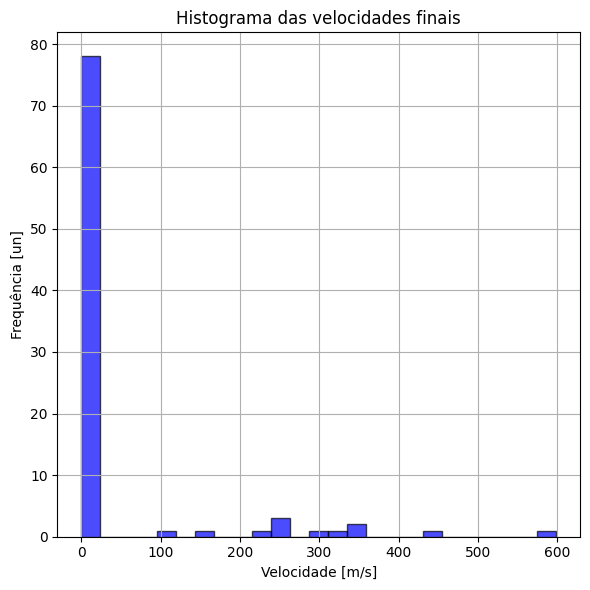

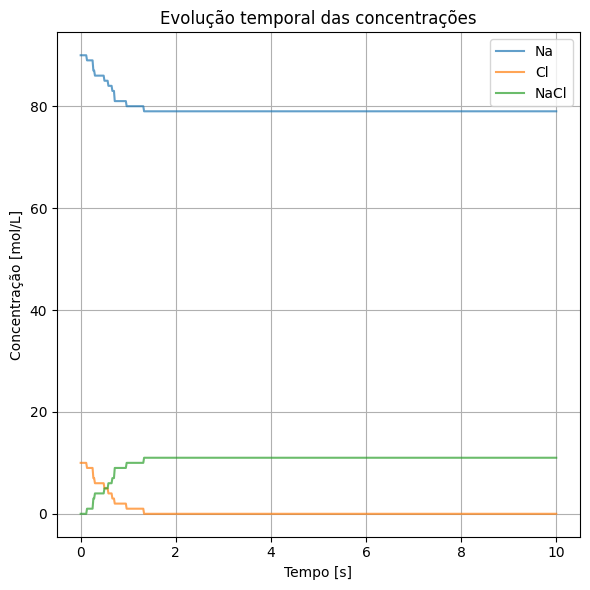

inversa 0      0.011111
1      0.011111
2      0.011111
3      0.011111
4      0.011111
         ...   
596    0.012658
597    0.012658
598    0.012658
599    0.012658
600    0.012658
Name: Na, Length: 601, dtype: float64
inversa_2 0      0.011111
1      0.011111
2      0.011111
3      0.011111
4      0.011111
         ...   
596    0.012658
597    0.012658
598    0.012658
599    0.012658
600    0.012658
Name: Na, Length: 601, dtype: float64


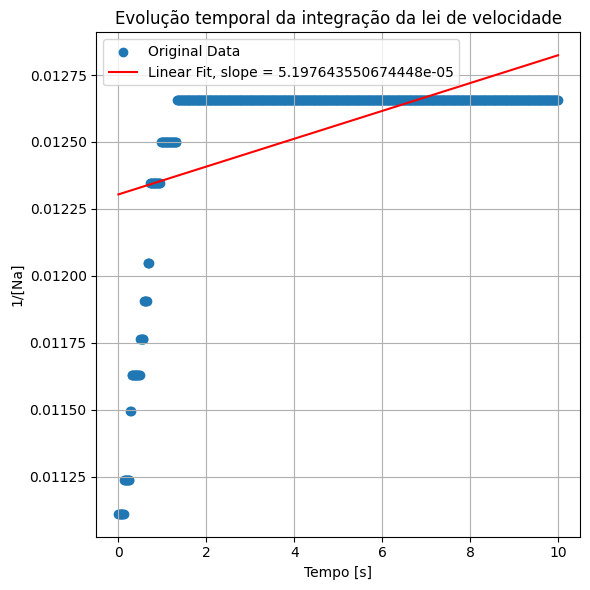

Variável independente_1: ['x']
Parâmetros modelo_1: ['exp_1_amplitude', 'exp_1_decay']

Variável independente_2: ['x']
Parâmetros modelo_2: ['exp_2_amplitude', 'exp_2_decay']
Name                Value      Min      Max   Stderr     Vary     Expr Brute_Step
exp_1_amplitude     81.35     -inf      inf     None     True     None     None
exp_1_decay           232     -inf      inf     None     True     None     None

Name                Value      Min      Max   Stderr     Vary     Expr Brute_Step
exp_2_amplitude  2.735e-08     -inf      inf     None     True     None     None
exp_2_decay        0.4036     -inf      inf     None     True     None     None
[[Model]]
    Model(exponential, prefix='exp_1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 600
    # variables        = 2
    chi-square         = 2024.49264
    reduced chi-square = 3.38543920
    Akaike info crit   = 733.686848
    Bayesian info crit = 742.480707
    R-squ

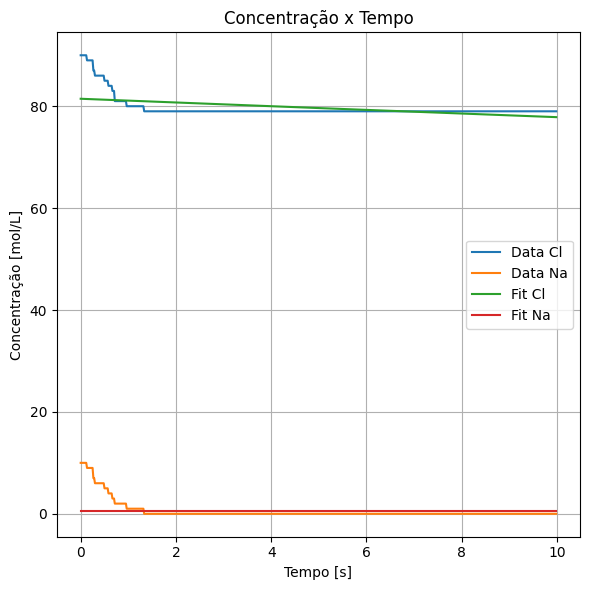

df: {'x_data': array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
       0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
       0.25      , 0.26666667, 0.28333333, 0.3       , 0.31666667,
       0.33333333, 0.35      , 0.36666667, 0.38333333, 0.4       ,
       0.41666667, 0.43333333, 0.45      , 0.46666667, 0.48333333,
       0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
       0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
       0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
       0.75      , 0.76666667, 0.78333333, 0.8       , 0.81666667,
       0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
       0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
       1.        , 1.01666667, 1.03333333, 1.05      , 1.06666667,
       1.08333333, 1.1       , 1.11666667, 1.13333333, 1.15      ,
       1.16666667, 1.18333333, 1.2       , 1.21

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_28064\1475677598.py:473: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(1/concentrations,derivative, label = "Concentração de Cl")
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_28064\1475677598.py:474: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(1/concentrations, result_quadratic.best_fit, label=f"Coeficiente K: {a_value}", color='red')


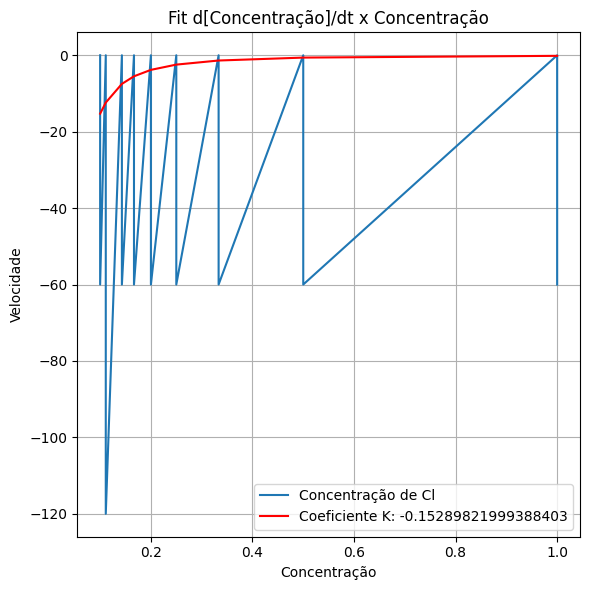

Temperatura Final do Sistema: 0.13 K


In [1]:
#Debugging 14-11-2023 == FALSE_V1; LATEST STABLE == V1
#UI == pygame
#Implementado gráfico Max-Boltz
#Implementação do fit da Lei de Velocidade
#'future' funciona (inherited 6_10)
#Colisão inelástica e elástica implementada
#Colisão futura implementada em classe Particul
#Reação química feita + grafico conc./tempo
#Fazer: encontrar a lei de velocidade (derivadas)
#Problemas: 
# -não é vetorializado
# -baixa eficiência por itertools
# -NA_CL_INDEX como global
# -a = 'Na', b = 'Cl'; a = 'Cl', b = 'Na'-> e se forem 3?
# -intersection_position_checker que nao precisa checar tudo ?
# -reações que geram partículas grandes podem gerar intersecção com outra que está indo em direção a esta

# Catálise homogênea e heterogênea - ver sobre
# Adição do catalisador como parede -> vel == 0 True
# O código é sobre heterogenea
# Adicionado 'states' para entender quais colisões e reações

#Vetorialização:
#Usar arrays; mínimo de for's e while's (loops); numpy; scipy cdist; numpy.greater

import random
import warnings
#import pygame
#from pygame.locals import *
from sys import exit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import ExponentialModel, LinearModel
from lmfit import Model, Parameters
import itertools

# VERSION AND TYPE
VERSION = '6_19_6'
TYPE = 'no_UI'
TYPE = 'UI'

# Constants
FPS = 60
DT = 1/FPS
ALTURA_CAIXA = 500
LARGURA_CAIXA = 500
NUM_PARTICULAS = 100
#GRID_SIZE = 10
FUTURE_FACTOR = 1.5
TIPO_COLISAO = 'elastic'
COEFICIENTE_RESTITUICAO = 0.0 #coeficiente de restituição

AVOGADRO_CONSTANT = 6.022e23 #constante de avogadro
BOLTZMANN_CONSTANT = 1.380649e-23 #m2 kg s-2 K-1

MASSA_PROTON = 1.67262192e-27 #em Kg
MASSA_NEUTRON = 1.65e-27 #em Kg

NAME_BOLTZ = f'max-boltz_{VERSION}_{TYPE}.png'
NAME_CONCENTRATION_PLOT = f'concentration_{VERSION}_{TYPE}.png'
NAME_INTEGRATION_RATE_LAW_PLOT = f'inverse_concentration_{VERSION}_{TYPE}.png'
NAME_FIT_CONCENTRATION_PLOT = f'fit_concentration_{VERSION}_{TYPE}.png'
NAME_VEL_RATE = f'velocidade_reacao_{VERSION}_{TYPE}.png'
NAME_CHEMICAL_CSV = f'df_chemical_data_{VERSION}_{TYPE}.csv'
NAME_MOLARITY_CSV = f'df_molarity_data_{VERSION}_{TYPE}.csv'
NAME_FINAL_SPEEDS_TXT = f'final_speeds_{VERSION}_{TYPE}.txt'
NAME_DETERMINE_TEMPERATURE_CSV = f'df_determine_temperature_{VERSION}_{TYPE}.csv'

# Indexes de moléculas das reações
NA_CL_INDEX = 0
CHANCE_NACL_GLOBAL = 0.4 #chances de não acontecer a reação

# Tempo de simulacao
SIMULATION_TIME = 10

MESSAGE_SUCCEEDED = f'sem interseccao \n FPS: {FPS} \n Altura da caixa: {ALTURA_CAIXA} \n Largura da caixa: {LARGURA_CAIXA} \n Número de partículas: {NUM_PARTICULAS} \n Tipo de colisão: {TIPO_COLISAO} \n Coeficiente de resituição: {COEFICIENTE_RESTITUICAO} \n Future factor: {FUTURE_FACTOR} \n Runtime: {SIMULATION_TIME} \n NaCl (not) chance {CHANCE_NACL_GLOBAL}'
MESSAGE_FAILED = f'com interseccao \n FPS: {FPS} \n Altura da caixa: {ALTURA_CAIXA} \n Largura da caixa: {LARGURA_CAIXA} \n Número de partículas: {NUM_PARTICULAS} \n Tipo de colisão: {TIPO_COLISAO} \n Coeficiente de resituição: {COEFICIENTE_RESTITUICAO} \n Future factor: {FUTURE_FACTOR} \n Runtime: {SIMULATION_TIME} \n NaCl (not) chance {CHANCE_NACL_GLOBAL}'


class Particula:
    def __init__(self, p_type, state, massa, raio, vel_x, vel_y, x, y, chance_reaction,cor):
        self.p_type = p_type
        self.state = state
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.x_future = None
        self.y_future = None
        self.chance_reaction = chance_reaction
        self.cor = cor
        #self.sprite_pygame = self.sprite_pygame()

    def deslocar(self):

        self.x += self.vel_x * DT
        self.y += self.vel_y * DT

    def next_position(self):
        self.x_future = self.x + self.vel_x * DT * FUTURE_FACTOR
        self.y_future = self.y + self.vel_y * DT * FUTURE_FACTOR

        if self.x_future < self.raio or self.x_future > LARGURA_CAIXA - self.raio:
            if self.p_type == "Na":
                self.state = 'fixed'
                self.vel_x = 0.0
                self.vel_y = 0.0
                self.chance_reaction = 1.0
            else:    
                self.vel_x *= -1
            #print("ativada por x")
        if self.y_future < self.raio or self.y_future > ALTURA_CAIXA - self.raio:
            if self.p_type == "Na":
                self.state = 'fixed'
                self.vel_x = 0.0
                self.vel_y = 0.0
                self.chance_reaction = 1.0
            else:
                self.vel_y *= -1
            #print("ativada por y")

        #print('next_position')

def check_collision(p1, p2):

    p1.next_position() #proxima_posicao

    p2.next_position() #proxima_posicao

    distance_future = np.sqrt((p2.x_future - p1.x_future)**2 + (p2.y_future - p1.y_future)**2)
    #distance = np.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if (distance_future <= p1.raio + p2.raio) == True:
        return True
    else:
        return False


def reaction_collision(particles, p1, p1_index, p2, p2_index):

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    vel_new_particle = ((p1.massa * v1) + (p2.massa * v2)) / (p1.massa + p2.massa) #apenas momento conservado

    #print('arrays_reaction_v:', v1, v2)

    CM_x = (p1.massa * p1.x + p2.massa * p2.x) / (p1.massa + p2.massa)
    CM_y = (p1.massa * p1.y + p2.massa * p2.y) / (p1.massa + p2.massa)

    p1_chance = p1.chance_reaction #chance de acontecer a reação
    p2_chance = p2.chance_reaction

    remove_particles = []
    add_particles = []

    #print('arrays_reaction_CM:', CM_x, CM_y )

    #new_particles = particles.copy()
    #print('old_particles:', particles)


    if ((p1.p_type == 'Na' and p2.p_type == 'Cl') or (p1.p_type == 'Cl' and p2.p_type == 'Na')) and (p1_chance > CHANCE_NACL_GLOBAL or p2_chance > CHANCE_NACL_GLOBAL):
        #print(p1.p_type, p2.p_type, 'form NaCl')

        global NA_CL_INDEX

        p_type = 'NaCl'
        state = 'mobile'
        massa = (p1.massa + p2.massa)
        raio = 5
        vel_x = vel_new_particle[0]
        vel_y = vel_new_particle[1]
        x = CM_x
        y = CM_y
        #x_future = x + vel_x * DT * FUTURE_FACTOR
        #y_future = y + vel_y * DT * FUTURE_FACTOR
        chance_reaction = 0.00005
        cor = (125, 125, 125)
        nome_particula = f"{p_type}_{NA_CL_INDEX}" 
        particle_instance = Particula(p_type, state, massa,raio, vel_x, vel_y, x, y, chance_reaction,cor)

        
        NA_CL_INDEX += 1

        add_particles.extend([{nome_particula : particle_instance}])
        #print(add_particles)

        #print("Before deletion:", particles.keys())
        #print(f"Deleting particles with indices: {p1_index}, {p2_index}")


        remove_particles.extend([p1_index, p2_index])
        #print(remove_particles)

        #del particles[p1_index]
        #del particles[p2_index]

        #print("After deletion:", particles.keys())


        return add_particles, remove_particles

    if p1.state == 'mobile' and p2.state == 'mobile':
        resolve_collision(p1,p2,collision_type=TIPO_COLISAO)
        return add_particles, remove_particles

    if ((p1.p_type == 'Na' and p2.p_type == 'NaCl') or (p1.p_type == 'NaCl' and p2.p_type == 'Na')):
        #print('Na + NaCl')

        if p2.state == 'fixed':
            p1.vel_x *= -1
            p1.vel_y *= -1

        if p1.state == 'fixed':
            p2.vel_x *= -1
            p2.vel_y *= -1

        return add_particles, remove_particles


    if ((p1.p_type == 'Na' and p2.p_type == 'Na') or (p1.p_type == 'Na' and p2.p_type == 'Na')):

        if p2.state == 'fixed':
            p1.vel_x *= -1
            p2.vel_y *= -1

        if p1.state == 'fixed':
            p2.vel_x *= -1
            p2.vel_y *= -1

        return add_particles, remove_particles

    else:
        #print('does not react')
        #print('collision solved')
        resolve_collision(p1,p2,collision_type=TIPO_COLISAO)
        return add_particles, remove_particles

    #print('new_particles:',particles)
    #print()

    #return particles
    #return deve ser dado depois de cada if se nn o else roda e resolve a colisão


def resolve_collision(p1, p2, collision_type='elastic'):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    #print('arrays_x:', x1, x2)

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    #print('arrays_v:', v1, v2)

    if collision_type == 'elastic' or collision_type == 'elastica':
        #print('elastica')

        C = 1

    if collision_type == 'partial_inelastic' or collision_type == 'parcial_inelastica':
        #print('inelastica')

        C = COEFICIENTE_RESTITUICAO

    new_v1 = v1 - ((((C * p2.massa) + p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2),(x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - ((((C * p1.massa) + p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1),(x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

    #print('resolution',p1.vel_x, p1.vel_y, p2.vel_x, p2.vel_y)

#src_elastica = https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects
#src_inelastica = https://physics.stackexchange.com/questions/708495/angle-free-two-dimensional-inelastic-collision-formula




def gerar_particula(n_particulas):
    particulas = {}

    #atomos
    atomos = {
        "Na": {"massa": 11*MASSA_PROTON + 12*MASSA_NEUTRON, "raio": 5, "color": (255, 0, 0)}, #approximations
        "Cl": {"massa": 17*MASSA_PROTON + 18*MASSA_NEUTRON, "raio": 5, "color": (0, 255, 0)},
        #"NaCl" : {"massa": 11*MASSA_PROTON + 12*MASSA_NEUTRON + 17*MASSA_PROTON + 18*MASSA_NEUTRON, "raio": 5, "color": (125, 125, 125)} #testes

    }


    todos_atomos = (int(0.9*NUM_PARTICULAS))*["Na"] + (int(0.1*NUM_PARTICULAS))*["Cl"]
    index_atomos = ([i for i in range(1, len(todos_atomos) + 1)])

    for atomos_selecionar, particle_index in zip(todos_atomos, index_atomos):

        attributes = atomos[atomos_selecionar]

        p_type = atomos_selecionar
        state = 'mobile'
        massa = attributes["massa"]
        raio = attributes["raio"]
        vel = random.uniform(600,1000)
        vel_angle = np.random.uniform(0, 2 * np.pi)
        vel_x = vel * np.cos(vel_angle) #velocidade inicial não especificada
        vel_y = vel * np.sin(vel_angle)
        x = random.uniform(raio, LARGURA_CAIXA - raio)
        y = random.uniform(raio, ALTURA_CAIXA - raio)
        #x_future = x + vel_x * DT * FUTURE_FACTOR
        #y_future = y + vel_y * DT * FUTURE_FACTOR
        chance_reaction = 0.00005
        cor = attributes["color"]
        nome_particula = f"{atomos_selecionar}_{particle_index}" 
        particle_instance = Particula(p_type, state, massa, raio, vel_x, vel_y, x, y, chance_reaction, cor)
        particulas[nome_particula] = particle_instance
        #print(vel_x,vel_y,vel,vel_angle)

    return particulas

def select_particles(particles):
    copy_particles = particles.copy()
    all_update = []
    all_remove = []

    for (name_p1, instance_p1), (name_p2, instance_p2) in itertools.combinations(particles.items(), 2):
        #print((name_p1, type(instance_p1)), (name_p2, type(instance_p2)))
        if check_collision(instance_p1, instance_p2):
            #print('foi pra reacted')
            reacted_particles = reaction_collision(particles, instance_p1, name_p1, instance_p2, name_p2)

            all_update.extend(reacted_particles[0])
            all_remove.extend(reacted_particles[1])
            


    for particle_name in all_remove:
        copy_particles.pop(particle_name, None)


    for particle_dict in all_update:
        copy_particles.update(particle_dict)

    return copy_particles



def intersection_pos_checker(particles,iteration_max = 1000):
    iteration_count = 0
    intersection = False
    #particle_pairs = np.array(list(itertools.permutations(particles.items(), 2)))
    for (name_p1, instance_p1), (name_p2, instance_p2) in itertools.combinations(particles.items(), 2):
        if check_collision(instance_p1, instance_p2):
                particle_move = random.choice([[name_p1,instance_p1], [name_p2,instance_p2]])
                new_x = random.uniform(particle_move[1].raio, LARGURA_CAIXA - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, ALTURA_CAIXA - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                #print(particles[particle_move[0]].y) #verificar coordenadas alteradas

                intersection = True
                if iteration_max == iteration_count:
                    confirmar_sem_interseccao(MESSAGE_FAILED)
                    warnings.warn(f'{iteration_max} iterações atingidas. Deve haver partículas sobrepostas. Altere o tamanho da caixa.')
                    return particles
    
    if intersection == True:
        #print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        confirmar_sem_interseccao(MESSAGE_SUCCEEDED)
        #print('False')
        return particles



def chemical_counter(particles,time_passed,system_temperature,df=pd.DataFrame()):
    chem_list = particles.keys()

    element_count = {}  # Initialize an empty dictionary to store element counts

    for item in chem_list:
        element = item.split('_')[0]  # Extract the element (part before the underscore)
        if element in element_count:
            element_count[element] += 1  # Increment the count if the element already exists
        else:
            element_count[element] = 1  # Initialize count to 1 if the element is encountered for the first time


    chem_array = np.concatenate((np.array([time_passed]),np.array([system_temperature]),np.array(list(element_count.values()))))
    df_chem = pd.DataFrame(chem_array).T
    df_chem.columns = np.concatenate((np.array(['Tempo [s]']),np.array(['Temperatura [K]']),np.array(list(element_count.keys()))))

    df_chem = pd.concat([df, df_chem], axis=0, ignore_index=True)

    return df_chem


def convert_to_molarity(df,liter):
    df_molar = df.copy()
    for column in range(1,df_molar.shape[1]):
        #print(column)
        df_molar.iloc[:,column] = ((df_molar.iloc[:,column]/AVOGADRO_CONSTANT)/liter)
    return df_molar

def determine_temperature(particles): #determina a temperatura baseada na média da vel. quadrada
    # sai de m*<v^2>/2 = 1/2 * 2 kt
    #nesse caso: <m*v**2>/2 = 0.5 * k*T
    array_vel_x = np.array([particle.vel_x for particle in particles.values()])
    array_vel_y = np.array([particle.vel_y for particle in particles.values()])
    array_massa = np.array([particle.massa for particle in particles.values()])

    mass_vel_average = np.mean(array_massa * np.sqrt((array_vel_x**2) + (array_vel_y**2)))
    temperature = mass_vel_average / (2*BOLTZMANN_CONSTANT) #dois graus de liberdade; sai em K

    return temperature

def df_compute_determine_temperature(particles,name):

    array_vel_x = np.array([particle.vel_x for particle in particles.values()])
    array_vel_y = np.array([particle.vel_y for particle in particles.values()])
    array_massa = np.array([particle.massa for particle in particles.values()])

    df_determine_temperature = pd.DataFrame({
    'massa': array_massa,
    'vel_x': array_vel_x,
    'vel_y': array_vel_y })

    df_determine_temperature.to_csv(name,index=None)


def vel_rate_plot(df,name):
    print('df:',df)
    #print(data_vel_fit['resultado_fit_1'])
    #print(data_vel_fit['resultado_fit_1'].best_fit)

    #dt = np.diff(df['Tempo [s]'])
    #var_reagente = np.diff(df['Na'])
    derivative = np.diff(df['y2_data'])/np.diff(df['x_data'])
    concentrations = df['y2_data'][:-1]


    # Define the quadratic model function
    def quadratic_model(x, a):
        return a * x**2
        
    mod = Model(quadratic_model)

# Automatically guess initial parameter values
    params_quadratic = Parameters()
    params_quadratic.add('a', value=1.0)
    #params_quadratic.add('b', value=1.0)
    #params_quadratic.add('c', value=1.0)

    # Perform the fit
    result_quadratic = mod.fit(derivative, params_quadratic, x=concentrations)

    # Print and visualize the fit results
    print(result_quadratic.fit_report())
    a_value = result_quadratic.params['a'].value
    #b_value = result_quadratic.params['b'].value
    #c_value = result_quadratic.params['c'].value

    fig2, ax2 = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
    #ax2.plot(data_vel_fit['y1_data'], derivative_1, label = "Velocidade em Cl")
    ax2.plot(1/concentrations,derivative, label = "Concentração de Cl")
    ax2.plot(1/concentrations, result_quadratic.best_fit, label=f"Coeficiente K: {a_value}", color='red')

    plt.title('Fit d[Concentração]/dt x Concentração')
    plt.xlabel('Concentração')
    plt.ylabel('Velocidade')
    plt.legend()
    plt.grid(True)
    fig2.tight_layout()
    fig2.savefig(name)  # Salva a figura
    plt.show()

def maxwell_boltzmann_plot(final_speeds,name):
    # Barplot/histograma das velocidades Max-Boltz.
    fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
    plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Velocidade [m/s]')
    plt.ylabel('Frequência [un]')
    plt.title('Histograma das velocidades finais')
    plt.grid(True)
    fig.tight_layout()
    fig.savefig(name)  # Salva a figura
    plt.show()

def concentration_plot(df,name):
    # Lineplot das concentrações/tempo.
    fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
    for y_axis, labels in zip(df.columns[2:],list(df.columns)[2:]):
        plt.plot(df['Tempo [s]'],(df[y_axis]),alpha=0.7, label=labels)
    plt.legend()
    plt.xlabel('Tempo [s]')
    plt.ylabel('Concentração [mol/L]')
    plt.title('Evolução temporal das concentrações')
    plt.grid(True)
    fig.tight_layout()
    fig.savefig(name)  # Salva a figura
    plt.show()


def fit_concentration_plot(df,name,sup_lim=-1):
    x_data = df.iloc[0:sup_lim,0].values

    y1_data = df.iloc[0:sup_lim,2].values #Cl
    y2_data = df.iloc[0:sup_lim,3].values #Na
    #print(len(y1_data),len(y2_data))

    modelo_exponencial_1 = ExponentialModel(prefix = 'exp_1_')
    modelo_exponencial_2 = ExponentialModel(prefix = 'exp_2_')
    print(f'Variável independente_1: {modelo_exponencial_1.independent_vars}')
    print(f'Parâmetros modelo_1: {modelo_exponencial_1.param_names}')
    print()
    print(f'Variável independente_2: {modelo_exponencial_2.independent_vars}')
    print(f'Parâmetros modelo_2: {modelo_exponencial_2.param_names}')

    params_exponencial_1 = modelo_exponencial_1.guess(y1_data,x=x_data)
    params_exponencial_2 = modelo_exponencial_2.guess(y2_data,x=x_data)
    params_exponencial_1.pretty_print()
    print()
    params_exponencial_2.pretty_print()

    resultado_fit_1 = modelo_exponencial_1.fit(y1_data, params_exponencial_1, x=x_data)
    resultado_fit_2 = modelo_exponencial_2.fit(y2_data, params_exponencial_2, x=x_data)
    print(resultado_fit_1.fit_report())
    print()
    print(resultado_fit_2.fit_report())

    fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
    ax.plot(x_data, y1_data, label="Data Cl")
    ax.plot(x_data, y2_data, label="Data Na")
    ax.plot(x_data, resultado_fit_1.best_fit, label="Fit Cl")
    ax.plot(x_data, resultado_fit_2.best_fit, label="Fit Na")
    plt.title('Concentração x Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Concentração [mol/L]')
    plt.legend()
    plt.grid(True)
    fig.tight_layout()
    fig.savefig(name)  # Salva a figura
    plt.show()

    data_vel_fit = {'x_data' : x_data,'resultado_fit_1' : resultado_fit_1, 'resultado_fit_2' : resultado_fit_2, 'y1_data' : y1_data, 'y2_data' : y2_data}

    return data_vel_fit


def integration_rate_law_plot(df,name):
    inverse = (1/df['Na'])
    print('inversa',inverse)
    inverse[np.isnan(inverse)] = 0
    inverse[np.isinf(inverse)] = 0
    print('inversa_2',inverse)
    #inverse = np.where(np.isinf(inverse), 0, inverse)
    # Lineplot das concentrações/tempo.
    fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
    model = LinearModel()
    params = model.make_params(slope=1, intercept=1)
    result = model.fit(inverse, params, x=df['Tempo [s]'])
    slope = result.params['slope'].value
    intercept = result.params['intercept'].value
    plt.scatter(df['Tempo [s]'], inverse, label='Original Data')
    plt.plot(df['Tempo [s]'], result.best_fit, label=f'Linear Fit, slope = {slope}', color='red') 


    #plt.plot(df['Tempo [s]'],(df[y_axis]),alpha=0.7, label=labels)
    plt.legend()
    plt.xlabel('Tempo [s]')
    plt.ylabel('1/[Na]')
    plt.title('Evolução temporal da integração da lei de velocidade')
    plt.grid(True)
    fig.tight_layout()
    fig.savefig(name)  # Salva a figura
    plt.show()

def confirmar_sem_interseccao(message):
    # Define the text you want to write to the file
    text_to_write = message

    # Specify the file name and open it in 'w' (write) mode
    file_name = "interseccao.txt"
    with open(file_name, "w") as file:
        # Write the text to the file
        file.write(text_to_write)


def main():
    final_speeds = []

    particles = gerar_particula(NUM_PARTICULAS)
    particles = intersection_pos_checker(particles)
    #sprites = create_particle_group_sprites(particles)

    #digito_atual = 0
    time_passed = 0
    system_temperature = determine_temperature(particles)
    #print('temperatura', type(system_temperature))
    df_chem = chemical_counter(particles, time_passed, system_temperature)

    #grid = Grid(LARGURA_CAIXA, ALTURA_CAIXA, GRID_SIZE)


    while True:
        if time_passed >= SIMULATION_TIME:
                # Pegar velocidades finais de todas as particulas
                final_speeds = [np.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2) for particle_instance in particles.values()]
                np.savetxt(NAME_FINAL_SPEEDS_TXT, final_speeds, fmt='%.2f')
                maxwell_boltzmann_plot(final_speeds,name=NAME_BOLTZ) #desligado para teste

                df_chem = df_chem.fillna(0)
                df_chem.to_csv(NAME_CHEMICAL_CSV, index=False)
                df_compute_determine_temperature(particles,name=NAME_DETERMINE_TEMPERATURE_CSV)
                #df_chem_molarity = convert_to_molarity(df_chem,1)
                #df_chem_molarity.to_csv(NAME_MOLARITY_CSV, index=False)
                concentration_plot(df_chem,name=NAME_CONCENTRATION_PLOT)
                integration_rate_law_plot(df_chem,name=NAME_INTEGRATION_RATE_LAW_PLOT)
                data_fit = fit_concentration_plot(df_chem,name=NAME_FIT_CONCENTRATION_PLOT)
                vel_rate_plot(data_fit,name=NAME_VEL_RATE)
                print(f'Temperatura Final do Sistema: {np.round(system_temperature,decimals=2)} K')
                break

        time_passed += DT
        system_temperature = determine_temperature(particles)
        df_chem = chemical_counter(particles,time_passed,system_temperature,df_chem)
            

        #print('after_reaction')
        particles = select_particles(particles)
        #print(type(after_reaction_particles))

        # Update particle positions after collision detection
        for particle_name, particle_instance in particles.items():
            particle_instance.deslocar()
            particle_instance.next_position() #usado para calcular if colisao == True
            #print('Debugger:',particle_instance.x, particle_instance.y, particle_instance.x_future, particle_instance.y_future)

if __name__ == "__main__":
    main()